In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

The series of reaction 

A$\xrightarrow[(1)]{k_{1A}}$B$\xrightarrow[(2)]{k_{2A}}$C

are catalyzed by H$_2$S0$_4$. 

You can download Fogler's book from here:
https://doku.pub/download/h-scott-fogler-essentials-of-chemical-reaction-engineering-z0x2ze484wqn

In [2]:
# Initially there is a total of 100 dm3 in the reactor, which contains 1.0 mol/dm3 of A and 1.0 mol/dm3 of the catalyst H2S04 
CAi = 1 # mol/dm3 at 290K
C_H2SO4 = 1 # mol/dm3 at 290K
v0i = 100 # dm3
N_H2SO4 = C_H2SO4*v0i # mol

CA0 = 4 # mol/dm3 at 305K
v0 = 240 # dm3/h at 305K
FA0 = CA0*240 # mol/h at 305K
T0 = 305 # K

k1A = 1.25 # h^-1 at 320K
E1A = 9500 # cal/mol at 320K

k2A = 0.08 # h^-1 at 290K
E2A = 7000 # cal/mol at 290K

dHrx1A = -6500 # cal/mol A
dHrx2B = 8000 # cal/mol B

CpA = 30 # cal/mol/K
CpB = 60 # cal/mol/K 
CpC = 20 # cal/mol/K 
Cp_H2SO4 = 35 # cal/mol/K

UA = 35000 # cal/h/K
Ta = 298 # K

In [3]:
def odes(t, y, *params):
    
    v0, k1A, E1A, k2A, k2A, UA, Ta, CpA, CpB, CpC, Cp_H2SO4, N_H2SO4, T0, dHrx1A, dHrx2B = params

    # assign each ODE (ordinary differential equation) to a vector element
    C = y[:-1]
    T = y[-1]
    
    # explicit equation inline
    k1A = k1A*np.exp((E1A/1.987)*(1/320-1/T)) 
    k2B = k2A*np.exp((E2A/1.987)*(1/290-1/T))
    
    # rate laws
    r1A = -k1A*C[0]
    r2B = -k2B*C[1]
    
    # relative rates
    r1B = -0.5*r1A
    r2C = -3*r2B
    
    # net rates
    ra = r1A
    rb = r1B + r2B
    rc = r2C
    
    V = 100 + v0*t

    # mass balance
    dCa_dt = ra + (CA0-C[0])*v0/V
    dCb_dt = rb-C[1]*v0/V 
    dCc_dt = rc-C[2]*v0/V
    
    # energy balance
    num = (UA*(Ta-T)-FA0*CpA*(T-T0)+((dHrx1A)*r1A+dHrx2B*r2B)*V)
    den = (C[0]*CpA+C[1]*CpB+C[2]*CpC)*V+N_H2SO4*Cp_H2SO4
    dT_dt = num/den
    
    return np.array([dCa_dt, dCb_dt, dCc_dt, dT_dt])

In [4]:
y0 = np.array([1.0, 0.0, 0.0, 290])

# declare a volume vector (volume window)
time = np.linspace(0, 1.5, 1000)

args = (v0, k1A, E1A, k2A, k2A, UA, Ta, CpA, CpB, CpC, Cp_H2SO4, N_H2SO4, T0, dHrx1A, dHrx2B)

# solution of the ode
sol = solve_ivp(odes, (0, time[-1]), y0, t_eval = time, args = args)

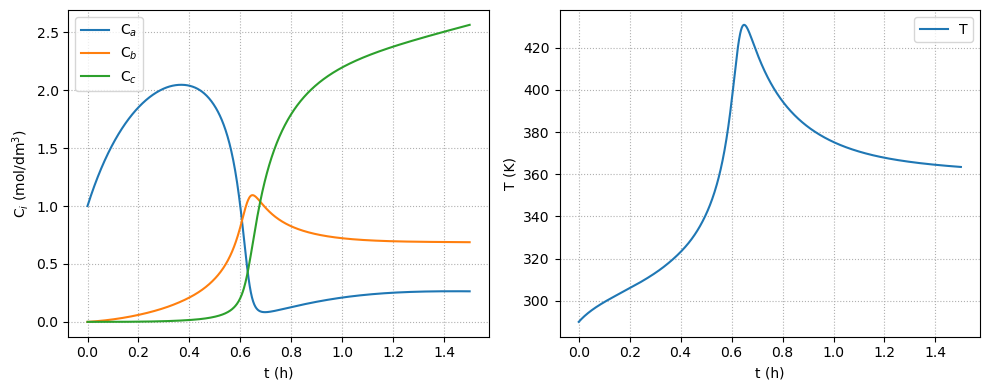

In [6]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,4))

ax[0].plot(sol.t, sol.y[0], label = "C$_a$")
ax[0].plot(sol.t, sol.y[1], label = "C$_b$")
ax[0].plot(sol.t, sol.y[2], label = "C$_c$")
ax[0].set_xlabel("t (h)")
ax[0].set_ylabel("C$_i$ (mol/dm$^3$)")
ax[0].legend()
ax[0].grid(ls = ":")

ax[1].plot(sol.t, sol.y[3], label = "T")
ax[1].set_xlabel("t (h)")
ax[1].set_ylabel("T (K)")
ax[1].legend()
ax[1].grid(ls = ":")

fig.tight_layout()

### Observations

At the start of the reaction both C$_A$ and T${in}$ in the reactor increase because C$_{A0}$ and T$_0$ are greater than C$_{Ai}$ and T$_i$. 

This increase continues until the rate of consumption of the reacting species is greater than the feed rate to the reactor. We note at about 0.2 h, the reactor temperature exceeds the feed temperature (i.e., 305 K) as a result of the heat generated by the exothermic reaction (1). The temperature continues to rise until about 0.6 h, at which point reactant A is virtually all consumed.

After this point the temperature begins to drop for two reasons:
- (I) the reactor is cooled by the heat exchanger and
- (II) heat is drawn by the exothermic reaction rate